## Project: Finding Donors for _CharityML_

The goal of this project is to identify potential donors for the company charityML. The company has to send out letters which have overhead cost as these have to be delivered to far away cities. In their experience, they have found that those donors with income greater than 50k are more likely to donate. However, having such a large amount of users, it is hard to determine their income which people tend to keep private. Hence, the task is to determine the income, whether it is above or below 50k, from various different features that are publically available. 

## Getting Started

In this project, we will employ several supervised algorithms to accurately model individuals' income using data collected from the 1994 U.S. Census. We will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Our goal with this implementation is to construct a model that accurately predicts whether an individual makes more than 50,000. (dollars)

Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features.

## Exploring the Data

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import visual utils
import visuals as vs

# Set style for matplotlib
plt.style.use('seaborn')

# Read-in data
data = pd.read_csv('census.csv')

# Looking at data
data.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Some Exploratory Metrics

In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = (data['income'] == '>50K').sum()

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = (data['income'] == '<=50K').sum()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k / n_records

# TODO: Number of NaN/Null values
null_values = data.isnull().values.sum()

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}".format(greater_percent))
print("Number of NaN/Null values in the dataset: {}".format(null_values))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 0.25
Number of NaN/Null values in the dataset: 0


### Feature Exploration

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Preparing the Data

Before data can be used as input to a machine learning model, certain steps need to be performed:

* Data must be brought into the right format. For example, in NLP projects, we can not work with textual data and we need to convert it to numerical form
* Data must be cleaned, i.e. we need to see if any values are missing or if any values are invalid.
* Data may need to be restructured.
* Data may need to be formatted.

This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features

In [3]:
# Split data into features and outcome
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

In [4]:
from collections import Counter
def plot_bar(data, col):
    obj = data[col]
    obj_count = Counter(obj)
    plt.barh(list(obj_count.keys()), list(obj_count.values()))
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [5]:
def plot_hist(data, col):
    plt.hist(data[col], bins=25)
    plt.title(col)
    plt.tight_layout()
    plt.show()

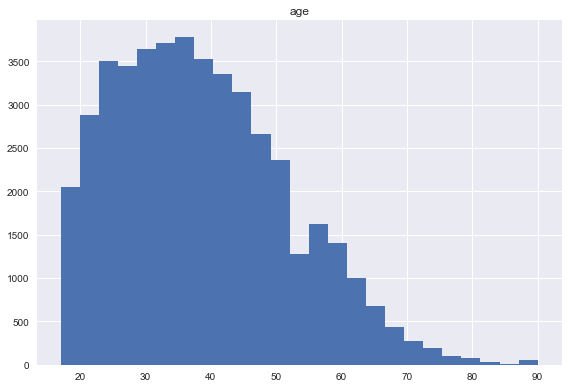

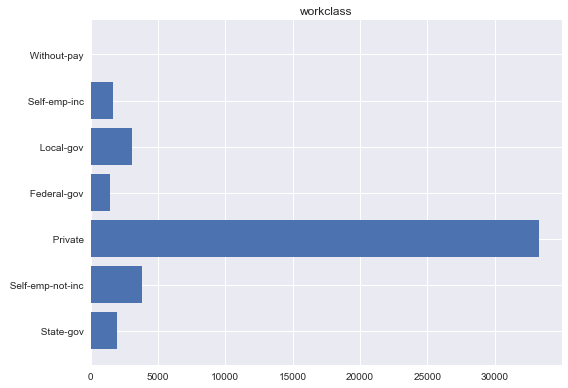

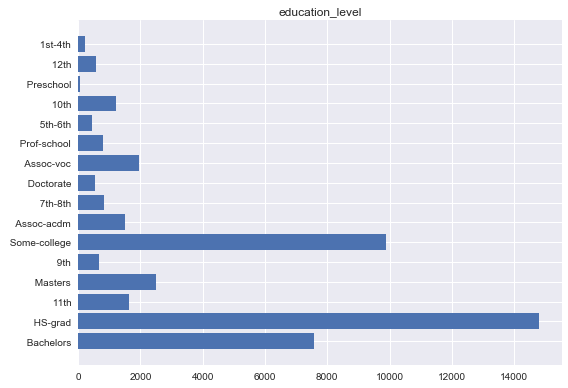

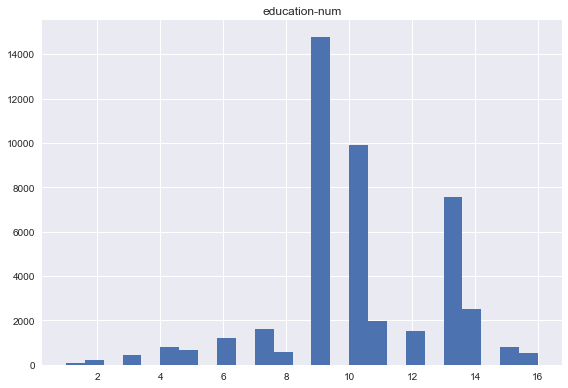

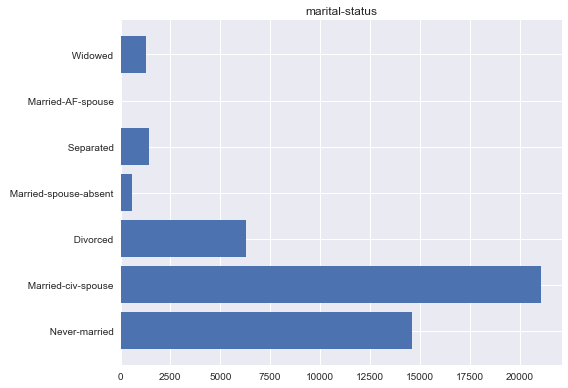

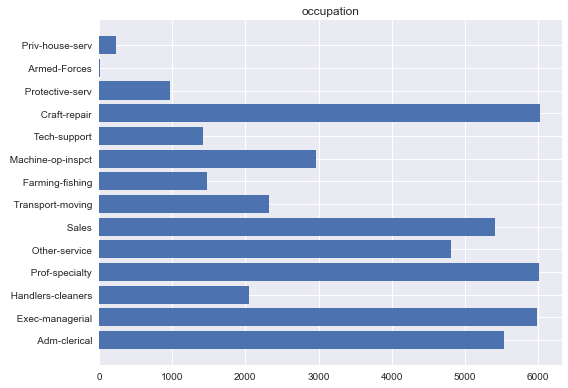

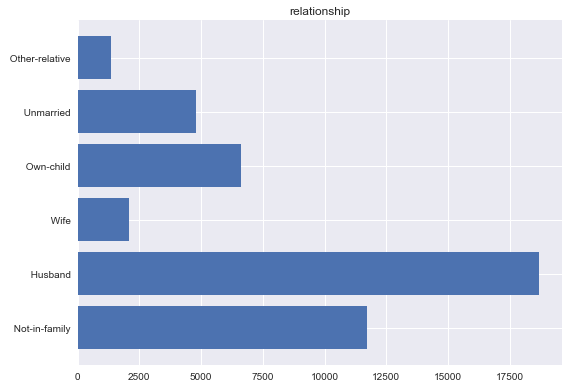

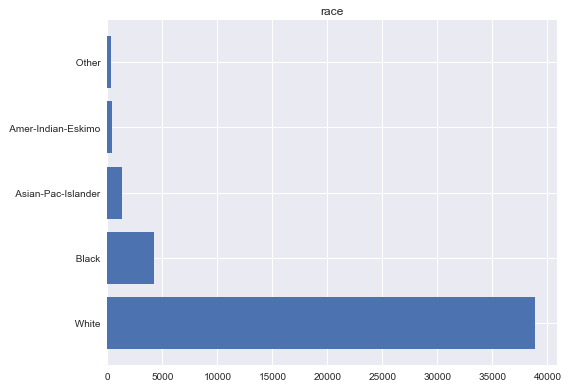

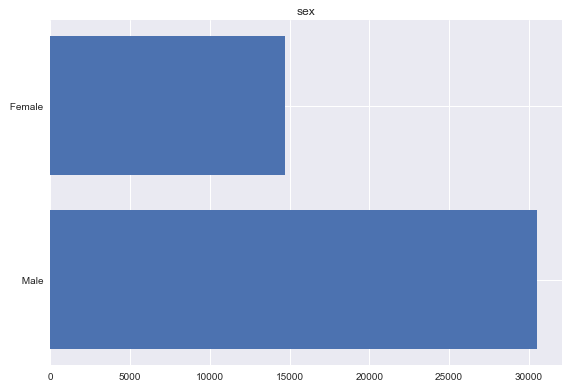

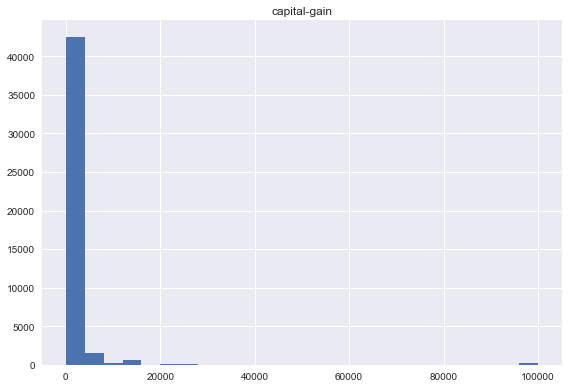

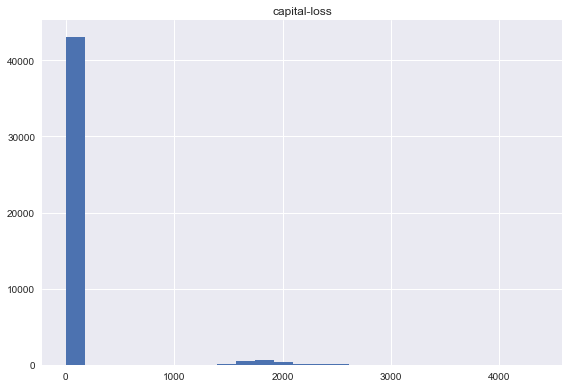

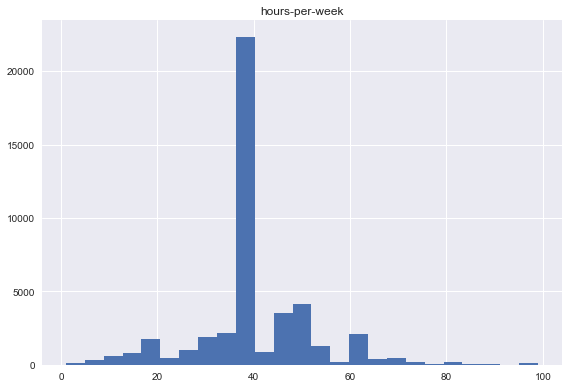

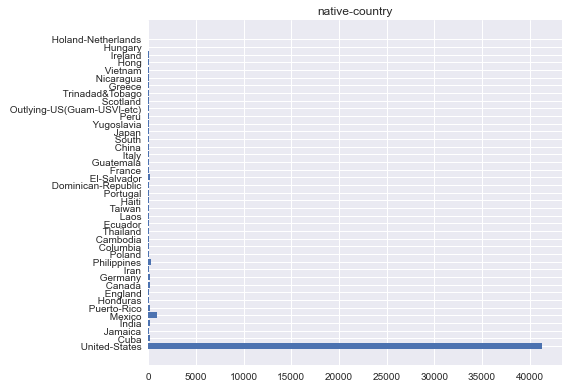

In [6]:
# Data Distribution for all features
numerical_features = []
textual_features = []
for col in features_raw.columns:
    if data[col].dtype == 'O':
        plot_bar(features_raw, col)
        textual_features.append(col)
    else:
        plot_hist(features_raw, col)
        numerical_features.append(col)
        

Here we see that capital_gain and capital_loss are skewed.

In case of textual data, we can not change the distribution of data without invalidating it. Moreover,
that distribution may have importance too. For example, those within the USA are most likely to donate.

__However, in case of numerical data, we can solve the issue by using a logarithmic transformation keeping in 
mind that logarithm of zero is not defined.__

In [7]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

C:\Users\Dell 15\Desktop\in-use\Intro to ML using PyTorch\16. Project 1- ChartityML\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


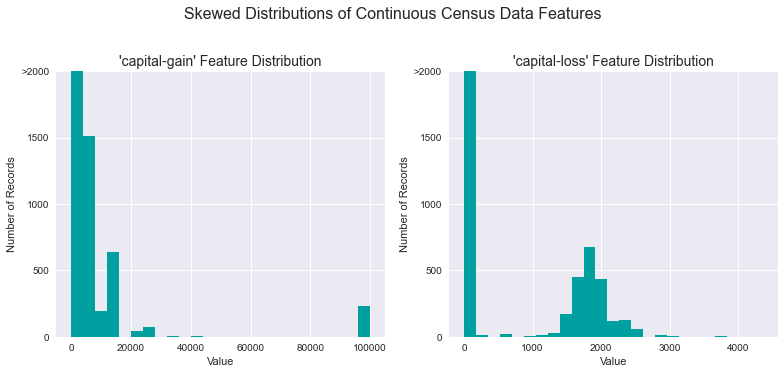

In [8]:
vs.distribution(data)

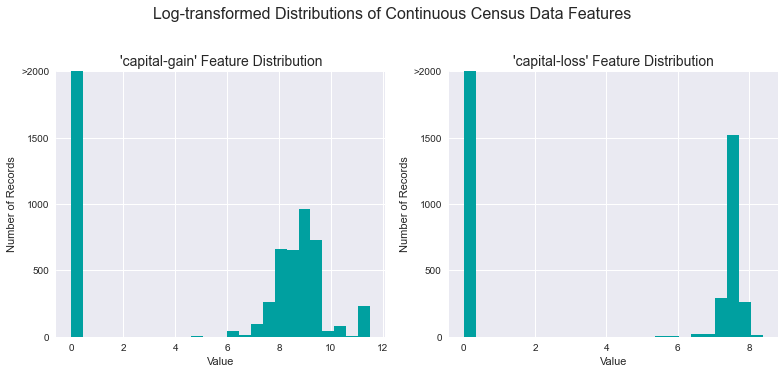

In [9]:
# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features

Applying a scaling to the data does not change the shape of each feature's distribution (such as 'capital-gain' or 'capital-loss' above); however, normalization ensures that each feature is treated equally when applying supervised learners.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_log_minmax_transformed = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transformed[numerical_features] = scaler.fit_transform(features_log_transformed[numerical_features])


features_log_minmax_transformed.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Working with Textual Data

We can not work with textual data directly as models can only take numerical data as input. 

1) As we see in our dataset, the textual data is categorical. For example,

* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

One popular way to convert categorical variables is by using the one-hot encoding scheme. 

2) Moreover, we see that we have two outcome labels, '>50k' and '<=50k'. Hence we need to bring these into the right format as well. Since we only have two labels, we can just encode them as 0 and 1.

In [11]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transformed)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0, '>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split the Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [13]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


## Model Selection

### Naive Predictor (Base Model)

Note that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.


* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [14]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
# encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP / (TP + FP)
recall = 1 # As FN = 0. So, recall = True Positives / (True Positives + 0)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
beta_2 = beta ** 2
fscore = ((1 + beta_2) * precision * recall) / ((beta_2 * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Supervised Learning Algorithms

We have studied various machine learning algorithms. The following are some of the algorithms which are also available in scikit-learn that we may choose from:

* Logistic Regression
* Decision Trees
* Naive Bayes
* Support Vector Machines (SVMs)
* Ensemble Methods (Random Forest, Bagging, AdaBoost)

For the three chosen models, state each of the following :- 

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

### 1) Support Vector Machines (SVMs)

#### Application
There are various different application of Support Vector Machines. Some of them are mentioned below:

* Cancer Diagnosis and Prognosis
* Speech Recognition
* Text Classification
* Facial Expression Classification

Hence we see that SVMs can be used for various kinds of classifcation problems involving different types of data.

#### Strengths
* SVMs consider two types of erros for an optimized solution. One is the classification error (same as logistic regression). And the other is Margin Error. Hence it not only tries to classifies points but also tries to find the best line. We can also control what weightage we give to classification error for flexibility.
* SVMs provide non-linearity with methods such as polynomial and RBF kernel.
* SVM is more effective in high dimensional spaces. (When the feature space is large)
* SVM is memory efficient

#### Weaknesses
* The running time complexity for SVMs is O(n^3) so it is not suitable for larger datasets
* SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
* Can only be applied to binary classification. For multi-class classification, we have to break the problem into several binary classfication problems.

#### Candidate
* After one-hot encoding, we have over a 100 features and SVMs work well when the number of features are large. Moreover, our dataset isn't too large. So SVMs would work well on our problem. 

### 2) Random Forests

#### Application
* Xbox Kinnect, where Random Forest is used for Real time Human Pose Recognition.
* Credit Card Fraud Detection
* Customer Segmentation
* Product Recommendation

#### Strenghts
* Random Forest is an ensemble algorithm which is used to find a good bias-variance tradeoff. Basically it helps to reduce overfitting by training mulitple decision trees on a subset of features and samples and then choosing voting to aggregate the resutls
* Has the ability to deal with unbalanced and missing data
* Works well for both categorical and continuous data

#### Weaknesses
* It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
* It also requires much time for training as it combines a lot of decision trees to determine the class.
* Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

#### Candidate
* Ensemble methods tend to provide accurate predictions for complex classification problems as well.




### 3) Ada Boost Classifier

#### Application
* Can not find a specific example, but can be used for various types of classification problems 

#### Strengths 
* AdaBoost classfier begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. This can result in accurate predictions

#### Weaknesses
* As this is an ensemble methods, a lot of computational resources are required.

#### Candidate
* Ensemble methods tend to provide accurate predictions for complex classification problems as well.



## Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

### Metrics

How do you tell which metric is more important for you among accuracy, precision and recall.

* Accuracy = (Correct Predictions / Total Predictions)

* precision = Among all the predictions that are positive, how many are actually positive
= TP / (TP + FP)
* recall = Among all the labels that are positive, how many are actually positive
= TP / (TP + FN)

To decide between precision and recall, see which one is more harmful for you.
False Positives or False Negatives. If False Positives are more important, then
you need high precision. If False Negatives are more important, then you need
high recall. Knowing this is important because we can use F-beta score accordingly.

In our example, False Positive is identifying someone as a potential donor when he is not. (However, we want to make sure that the ones we do identify as donors, are actually donors. So for us, precision is more important.)
False Negative is not identifying someone as a donot when he was. (There can be many potential donors and we can not identify all of them. Since our data is skewed, using accuracy would not be a good metric. F-beta score involves both precision and recall and we can also set the weights of both. It is given as:|

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).



In [15]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
       
    return: results dictionary containing various metrics such as: 
        - training_time
        - prediction_time
        - accuracy_score (train+test)
        - fscores (train+test)
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(predictions_train, y_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(predictions_test, y_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(predictions_train, y_train[:300], beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(predictions_test, y_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

## Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [16]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# TODO: Initialize the three models
clf_A = SVC()
clf_B = RandomForestClassifier()
clf_C = AdaBoostClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(0.1 * samples_100)
samples_1 = int(0.01 * samples_100)

# Collect results for the three classifier 
clfs = [clf_A, clf_B, clf_C]
samples = [samples_1, samples_10, samples_100]
results = {}

for clf in clfs:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, sample in enumerate(samples):
        results[clf_name][i] = train_predict(clf, sample, X_train, y_train, X_test, y_test)

SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


C:\Users\Dell 15\Desktop\in-use\Intro to ML using PyTorch\16. Project 1- ChartityML\visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


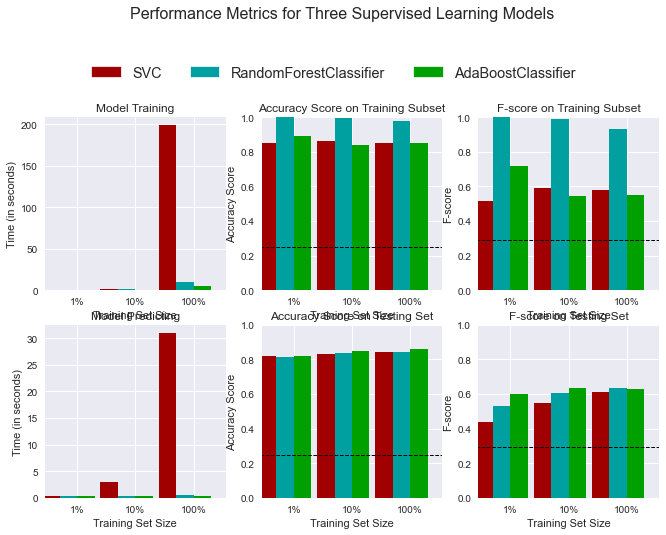

In [17]:
# Run metrics visualization for the three supervised learning models chosen
# This plots the metrics i.e (time, accuracy, F-score) for train and test sets for the given samples
vs.evaluate(results, accuracy, fscore)

## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Choosing the best model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

__On observing the above plots, we observe Random Forest to be the best model. This is because the F-score for testing data when 100% of the training data is used is the highest for Random Forest. This, combined with small training and predcitions times and a perfect F-score for training data, we claim Random Forest to be the our best model.__

### Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [20]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

param_dict = {'max_depth': [5,10,15,30]}

scorer = make_scorer(fbeta_score, beta=0.5)

grid_obj = GridSearchCV(clf, param_grid=param_dict, scoring=scorer)

In [21]:
grid_obj = grid_obj.fit(X_train, y_train)

In [22]:
best_clf = grid_obj.best_estimator_

In [23]:
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8436
F-score on testing data: 0.6842

Optimized Model
------
Final accuracy score on the testing data: 0.8599
Final F-score on the testing data: 0.7351


### Final Model Evaluation

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.84         |      0.85       |
| F-score        |      0.68         |      0.73       |


__Discussion__

As seen in the table above, we can see that the optimized model performed better both in terms of accuracy and F-score. It also obviously performs a lot better than our base naive model. 

## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

I would rank the top 5 features in the following manner:

* Education
* Occpation
* Hours Per Work
* Relationship
* Age

__Answer:__
Features like education, occpuation and hours per work are strong determinants for how much a person earns. For example, if a person is well educated, is in a respectable occupation and has greater number of hours per work, then he is more likely to earn more money. Similarly, relationship determines how much the person has to spend. Lastly, age can also be a factor.

### Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

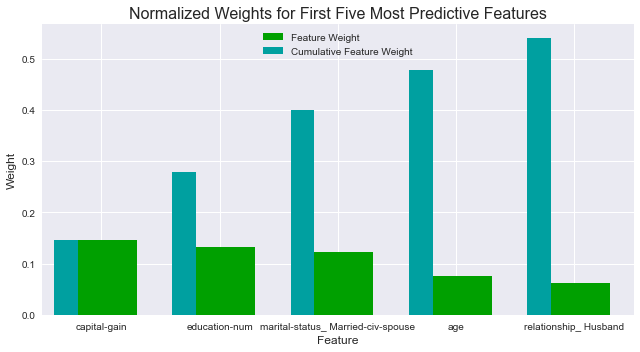

In [27]:
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

__Answer:__ Education, age and relationship are the three features I predicted were important. Marrital status is somewhat related to relationship. I did not think of capital_gain, but that obviously holds a lot of importance because that is the only numerical data directly linked with how much income a person has




### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [37]:
# Import functionality for cloning a model
# It yields a new estimator with the same parameters that has not been fitted on any data.
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8599
F-score on testing data: 0.7351

Final Model trained on reduced data
------
Accuracy on testing data: 0.8447
F-score on testing data: 0.6911


### Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

__Answer__: We see that the accuracy and the f-score are both comparable. If training time was a factor, I would definitely consider using the reduced data as the training set. 